<a href="https://maestriasydiplomados.tec.mx/posgrados/maestria-en-inteligencia-artificial-aplicada"><img src="logo_MR4010.png"></a>
- David Elías Limas Palacios  A01560923
- Christopher David Parga Jaramillo  A00818942
- Marcelo Ismael López Verdugo   A00959089


# Actividad 3.1 - Detección de Peatones con SVM
Para esta actividad se utilizo el dataset de INRIA Person para deteccion de peatones, el cual ya contiene imagenes para el entrenamiento y de prueba por lo cual se modificara la implementacion mas adelante. 
### https://paperswithcode.com/dataset/inria-person

# Se cargan las bibliotecas necesarias

In [175]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog

# Se importan los dos datasets 
### https://docs.python.org/3/library/glob.html

In [243]:
import glob
person = glob.glob("INRIAPerson/Train/pos/**")
no_person = glob.glob("INRIAPerson/Train/neg/**")

In [244]:
len(person)

614

In [245]:
len(no_person)

1197

# Se muestra una imagen con persona
Se van a modificar los tamanos de las imagenes cuando se carguen, ya que el dataset contiene imagenes de distintos tamanos asi que para tener consistencia entre ellas se ajustaran sus tamanos a 64x64 para el ejercicio (se escogio esta resolucion para facilitar tiempos de procesamiento)

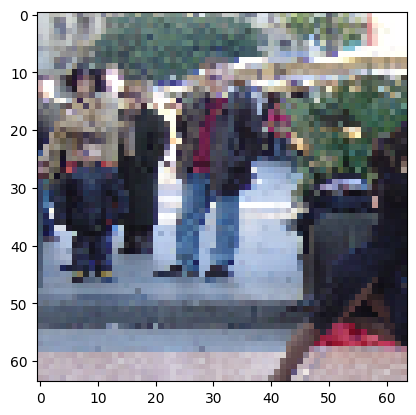

In [313]:
img_color_P = cv2.imread(person[0])
img_color_P = cv2.resize(img_color_P,(64,64))
img_color_P = cv2.cvtColor(img_color_P, cv2.COLOR_BGR2RGB)
plt.imshow(img_color_P)

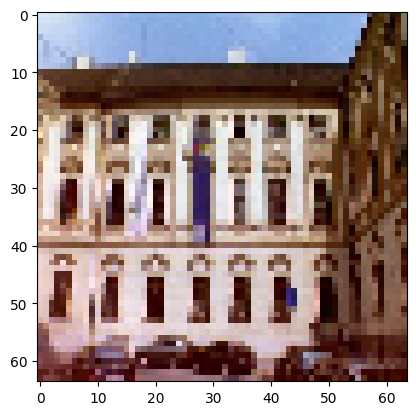

In [315]:
img_color_N = cv2.imread(no_person[10])
img_color_N = cv2.resize(img_color_N,(64,64))
img_color_N = cv2.cvtColor(img_color_N, cv2.COLOR_BGR2RGB)
plt.imshow(img_color_N)

# Para fines de demostración se calcula el HOG de la imagen

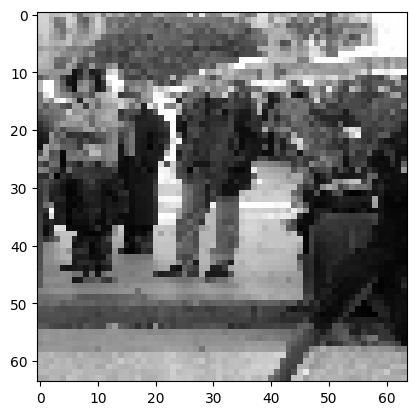

In [316]:
img_gray_P = cv2.cvtColor(img_color_P,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray_P,cmap="gray")

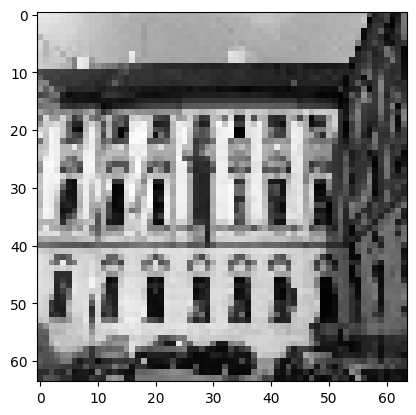

In [317]:
img_gray_N = cv2.cvtColor(img_color_N,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray_N,cmap="gray")

In [318]:
features,hog_img = hog(img_gray_P,
                       orientations = 11,
                       pixels_per_cell = (16,16),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)

In [319]:
features.shape

(396,)

In [320]:
hog_img.shape

(64, 64)

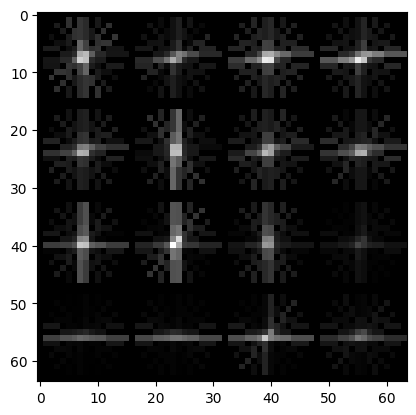

In [321]:
plt.imshow(hog_img,cmap = 'gray')

# Se extraen las features del HOG para ambos tipos de datos

In [202]:
person_hog_accum = []

for i in person:
    img_color = mpimg.imread(i)
    img_color = cv2.resize(img_color,(64,64))
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    person_hog_feature, person_hog_img = hog(img_gray,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    person_hog_accum.append(person_hog_feature)

In [288]:
X_person = np.vstack(person_hog_accum).astype(np.float64)
y_person = np.ones(len(X_person))

In [204]:
X_person.shape

(614, 396)

In [205]:
y_person.shape

(614,)

In [251]:
noperson_hog_accum = []

for i in no_person:
    img_color = mpimg.imread(i)
    img_color = cv2.resize(img_color,(64,64))
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    noperson_hog_feature, noperson_hog_img = hog(img_gray,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    noperson_hog_accum.append(noperson_hog_feature)

In [257]:
X_noperson = np.vstack(noperson_hog_accum).astype(np.float64)
y_noperson = np.zeros(len(X_noperson))

In [258]:
X_noperson.shape

(1197, 396)

In [259]:
y_noperson.shape

(1197,)

# Se combinan ambos tipos de datos para alimentar el SVM

In [289]:
X_train = np.vstack((X_person,X_noperson))
X_train.shape

(1811, 396)

In [290]:
y_train = np.hstack((y_person,y_noperson))
y_train.shape

(1811,)

# Se generan los datos de entrenamiento y de prueba
- Nuestro dataset ya cuenta con un set de prueba, asi que se repiten los pasos anteriores para dejarlo de la misma forma que el set de entrenamiento

In [322]:
def procesamiento(lista):
    hog_accum = []

    for i in lista:
        img_color = mpimg.imread(i)
        img_color = cv2.resize(img_color,(64,64))
        img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
        
        hog_feature, hog_img                    = hog(img_gray,
                                                orientations = 11,
                                                pixels_per_cell = (16,16),
                                                cells_per_block = (2,2),
                                                transform_sqrt = False,
                                                visualize = True,
                                                feature_vector = True)
        
        hog_accum.append(hog_feature)
    return hog_accum

In [323]:
person_test = glob.glob("INRIAPerson/Test/pos/**")
no_person_test = glob.glob("INRIAPerson/Test/neg/**")

In [324]:
X_person_test = np.vstack(procesamiento(person_test)).astype(np.float64)
y_person_test = np.ones(len(X_person_test))

X_noperson_test = np.vstack(procesamiento(no_person_test)).astype(np.float64)
y_noperson_test = np.zeros(len(X_noperson_test))

In [325]:
X_test = np.vstack((X_person_test,X_noperson_test))
y_test = np.hstack((y_person_test,y_noperson_test))
print(X_test.shape,y_test.shape)

(741, 396) (741,)


- Se hace el shuffle de los arreglos y se asigna la semilla para tener reproducibilidad a futuro

In [340]:
np.random.seed(42)

# Genera una permutación aleatoria de índices
indices_train = np.random.permutation(len(X_train))
indices_test = np.random.permutation(len(X_test))

# Aplica esa permutación a ambos arreglos
x_train_shuffled = X_train[indices_train]
y_train_shuffled = y_train[indices_train]

x_test_shuffled = X_test[indices_test]
y_test_shuffled = y_test[indices_test]

In [341]:
X_train.shape

(1811, 396)

In [342]:
X_test.shape

(741, 396)

# Se importa el Clasificador y se entrena

In [343]:
#from sklearn.svm import LinearSVC

#svc_model = LinearSVC()
#svc_model.fit(X_train, y_train)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train_shuffled,y_train_shuffled)

SVC()

In [344]:
y_predict = svc_model.predict(x_test_shuffled)

<Axes: >

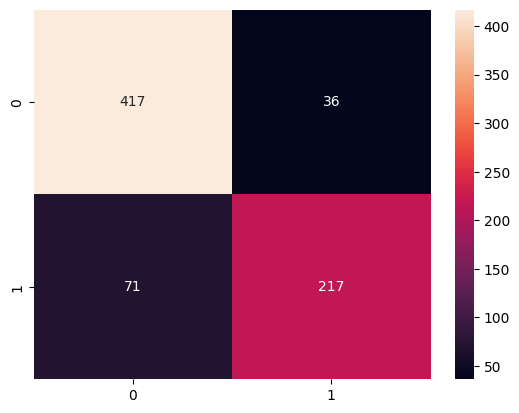

In [345]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test_shuffled,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [346]:
print(classification_report(y_test_shuffled,y_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89       453
         1.0       0.86      0.75      0.80       288

    accuracy                           0.86       741
   macro avg       0.86      0.84      0.84       741
weighted avg       0.86      0.86      0.85       741



# GridSearchCV

In [347]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [348]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train_shuffled,y_train_shuffled)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.675 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.680 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.685 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.680 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.660 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.660 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [349]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [350]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [351]:
grid_predictions = grid.predict(x_test_shuffled)

<Axes: >

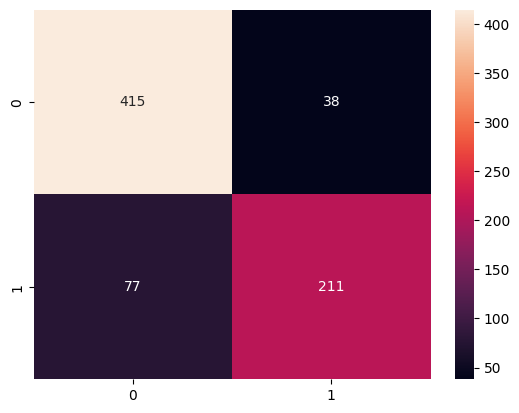

In [352]:
cm = confusion_matrix(y_test_shuffled,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [353]:
print(classification_report(y_test_shuffled,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       453
         1.0       0.85      0.73      0.79       288

    accuracy                           0.84       741
   macro avg       0.85      0.82      0.83       741
weighted avg       0.85      0.84      0.84       741



# Gracias por la atención